<a href="https://colab.research.google.com/github/liddlecody/ds2002superhero/blob/main/superhero_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superhero Database Assignment (SQLite & Google Colab)

## Objective
In this assignment, you will design and implement a **Superhero Database** using SQLite in Google Colab. This database will store superheroes, villains, and their battles. You will write SQL queries to analyze battle outcomes and relationships between heroes and villains.

### Group Size:
- 2 to 3 students per group.

### Tools Required:
- **Google Colab**
- **SQLite (built into Python)**
- **CSV files (provided for import)**

## Step 1: Setting Up Your SQLite Database

### Tasks:
1. Initialize SQLite in Google Colab.
2. Create a database named `superhero_db.sqlite`.
3. Define the database schema, ensuring it includes the following tables:
   - `heroes`: Stores superhero names, powers, and teams.
   - `villains`: Stores villains and their evil plans.
   - `battles`: Tracks battles between heroes and villains, including the outcome.
4. Implement primary keys and foreign keys where appropriate.

✅ **Checkpoint:** Ensure that the database and tables have been successfully created.

In [ ]:
import sqlite3
import pandas as pd

conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

#create the superhero database
conn = sqlite3.connect('superhero_db.sqlite')
cursor = conn.cursor()

# create the 'heroes' table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS heroes (
        hero_id INTEGER PRIMARY KEY AUTOINCREMENT,
        hero_name TEXT NOT NULL,
        power TEXT,
        team TEXT
    )
''')

# create the 'villains' table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS villains (
        villain_id INTEGER PRIMARY KEY AUTOINCREMENT,
        villain_name TEXT NOT NULL,
        evil_plan TEXT
    )
''')

# Create the 'battles' table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS battles (
        battle_id INTEGER PRIMARY KEY AUTOINCREMENT,
        hero_id INTEGER,
        villain_id INTEGER,
        outcome TEXT,
        FOREIGN KEY (hero_id) REFERENCES heroes(hero_id),
        FOREIGN KEY (villain_id) REFERENCES villains(villain_id)
    )
''')

conn.commit()
conn.close()

conn = sqlite3.connect('superhero_db.sqlite')
cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

print("Tables created:")
for table in tables:
    print(table[0])


Tables created:
heroes
sqlite_sequence
villains
battles


## Step 2: Import Data from CSV Files

### Tasks:
1. Download the provided CSV files.
2. Upload them to Google Colab.
3. Write a script to import data from these files into the appropriate tables.
4. Verify that the data has been successfully inserted.

✅ **Checkpoint:** Ensure that each table contains the expected data from the CSV files.

In [ ]:
# Load data from CSV into a DataFrame
df_heroes = pd.read_csv('/content/heroes.csv')

# Display the first few rows of the DataFrame
print(df_heroes.head())

# Insert data from the DataFrame into the heroes table
df_heroes.to_sql('heroes', conn, if_exists='replace', index=False)


# Load data from CSV into a DataFrame
df_villains = pd.read_csv('/content/villains.csv')

# Display the first few rows of the DataFrame
print(df_villains.head())

# Insert data from the DataFrame into the heroes table
df_villains.to_sql('villains', conn, if_exists='replace', index=False)


# Load data from CSV into a DataFrame
df_battles = pd.read_csv('/content/battles.csv')

# Display the first few rows of the DataFrame
print(df_battles.head())

df_battles.to_sql('battles', conn, if_exists='replace', index=False)

cursor.execute("SELECT * FROM heroes")
rows = cursor.fetchall()
print("\nData in the 'heroes' table:")
for row in rows:
    print(row)

cursor.execute("SELECT * FROM villains")
rows2 = cursor.fetchall()
print("\nData in the 'villains' table:")
for row in rows2:
    print(row)


cursor.execute("SELECT * FROM battles")
rows3 = cursor.fetchall()
print("\nData in the 'battles' table:")
for row in rows3:
    print(row)

   id        name             power            team
0   1  Spider-Man      Web-slinging        Avengers
1   2    Iron Man     Powered Armor        Avengers
2   3      Batman  Genius Detective  Justice League
3   4    Superman    Super Strength  Justice League
4   5        Thor    God of Thunder        Avengers
   id          name                           evil_plan
0   1  Green Goblin                  Terrorize New York
1   2        Thanos         Collect all Infinity Stones
2   3         Joker              Spread chaos in Gotham
3   4    Lex Luthor                     Defeat Superman
4   5          Loki  Trick humanity into worshiping him
   id  hero_id  villain_id       outcome
0   1        1          10  Villain Wins
1   2        9           3     Hero Wins
2   3        8           1          Draw
3   4        5           4  Villain Wins
4   5        1           7     Hero Wins

Data in the 'heroes' table:
(1, 'Spider-Man', 'Web-slinging', 'Avengers')
(2, 'Iron Man', 'Powered Armor'

## Step 3: Querying the Database

### Tasks:
Write SQL queries to answer the following:
1. Retrieve all superheroes and their powers.
2. Find all battles where the hero won.
3. List all villains and their evil plans.
4. Determine which superhero has fought the most battles.

✅ **Checkpoint:** Ensure that all queries return meaningful results from the database.

In [ ]:
cursor.execute('''
    SELECT name, power
    FROM heroes
''')
rows = cursor.fetchall()
for row in rows:
    print(row)

('Spider-Man', 'Web-slinging')
('Iron Man', 'Powered Armor')
('Batman', 'Genius Detective')
('Superman', 'Super Strength')
('Thor', 'God of Thunder')
('Wonder Woman', 'Amazonian Strength')
('Black Panther', 'Enhanced Agility')
('The Flash', 'Super Speed')
('Hulk', 'Super Strength')
('Doctor Strange', 'Mystic Arts')


In [ ]:
cursor.execute('''
    SELECT H.name, V.name, outcome
    FROM heroes H
    JOIN battles ON H.id = battles.hero_id
    JOIN villains V ON battles.villain_id = V.id
    WHERE outcome = 'Hero Wins'
''')
rows = cursor.fetchall()
for row in rows:
    print(row)

('Hulk', 'Joker', 'Hero Wins')
('Spider-Man', 'Darkseid', 'Hero Wins')
('Hulk', 'Venom', 'Hero Wins')
('Batman', 'Thanos', 'Hero Wins')
('Black Panther', 'Loki', 'Hero Wins')
('The Flash', 'Magneto', 'Hero Wins')
('Batman', 'Lex Luthor', 'Hero Wins')
('Batman', 'Loki', 'Hero Wins')
('Thor', 'Loki', 'Hero Wins')


In [ ]:
cursor.execute('''
    SELECT name, evil_plan
    FROM villains
''')
rows = cursor.fetchall()
for row in rows:
    print(row)

('Green Goblin', 'Terrorize New York')
('Thanos', 'Collect all Infinity Stones')
('Joker', 'Spread chaos in Gotham')
('Lex Luthor', 'Defeat Superman')
('Loki', 'Trick humanity into worshiping him')
('Ultron', 'AI world domination')
('Darkseid', 'Control the universe')
('Venom', 'Consume Spider-Man')
('Magneto', 'Mutant supremacy')
('Red Skull', 'Revive Hydra')


In [ ]:
cursor.execute('''
    SELECT H.name, COUNT(B.id) AS battle_count
    FROM heroes H
    JOIN battles B ON H.id = B.hero_id
    GROUP BY H.name
    ORDER BY battle_count DESC
    LIMIT 1''')

rows = cursor.fetchall()
for row in rows:
    print(row)

('Batman', 7)


## Step 4: Add a Custom Feature

### Tasks:
1. Design and implement an additional table related to superheroes or villains.
2. Populate it with data.
3. Write at least one query to retrieve meaningful insights from the new table.

**Examples of Custom Features:**
- Sidekicks for superheroes
- Villain hideouts
- Battle locations
- Superhero equipment

✅ **Checkpoint:** Ensure that the new table and queries function correctly.

In [ ]:
# Reopen the database connection
conn = sqlite3.connect('superhero_db.sqlite')
cursor = conn.cursor()

# Create the 'sidekicks' table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sidekicks (
        sidekick_id INTEGER PRIMARY KEY AUTOINCREMENT,
        hero_id INTEGER,
        sidekick_name TEXT NOT NULL,
        FOREIGN KEY (hero_id) REFERENCES heroes(hero_id)
    )
''')

# Insert data into the 'sidekicks' table
sidekicks = [
    (1, 'billy'),
    (2, 'bob'),
    (3, 'joe'),
    (4, 'mario'),
    (5, 'bokki'),
    (6, 'sonic'),
    (7, 'shrek'),
    (8, 'fish'),
    (9, 'shrimp'),
    (10, 'crab')
]


cursor.executemany('''
    INSERT INTO sidekicks (hero_id, sidekick_name) VALUES (?, ?)
''', sidekicks)

print("Database populated with data!")
# Commit changes and close connection
conn.commit()


# check if tables were created
conn = sqlite3.connect('superhero_db.sqlite')
cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

print("Tables created:")
for table in tables:
    print(table[0])

conn.close()

Database populated with data!
Tables created:
sqlite_sequence
heroes
villains
battles
sidekicks


In [ ]:
# Reconnect to the database to check if sidekicks are properly linked with heroes
conn = sqlite3.connect('superhero_db.sqlite')
cursor = conn.cursor()

# Check if the hero_id in sidekicks matches with hero_id in the heroes table
cursor.execute('''
    SELECT s.sidekick_name, h.name
    FROM sidekicks s
    JOIN heroes h ON s.hero_id = h.id;  -- Updated column name for hero_id
''')

# Fetch the results and store them in a variable
sidekick_hero_match = cursor.fetchall()

# Print matching sidekicks with their heroes
print("Sidekicks and their heroes:")
for match in sidekick_hero_match:
    print(f"Sidekick: {match[0]}, Hero: {match[1]}")


Sidekicks and their heroes:
Sidekick: billy, Hero: Spider-Man
Sidekick: bob, Hero: Iron Man
Sidekick: joe, Hero: Batman
Sidekick: mario, Hero: Superman
Sidekick: bokki, Hero: Thor
Sidekick: sonic, Hero: Wonder Woman
Sidekick: shrek, Hero: Black Panther
Sidekick: fish, Hero: The Flash
Sidekick: shrimp, Hero: Hulk
Sidekick: crab, Hero: Doctor Strange


## Bonus Challenge (+5 Points)

### Tasks:
1. Enhance your project by adding a visual or interactive component.

**Options:**
- Visualize battles using Matplotlib (e.g., a bar chart showing how many battles each superhero has fought).
- Make it interactive (e.g., allow users to input a superhero name and display their battles).

✅ **Checkpoint:** If attempting the bonus, ensure that your visualization or interactive component works correctly.

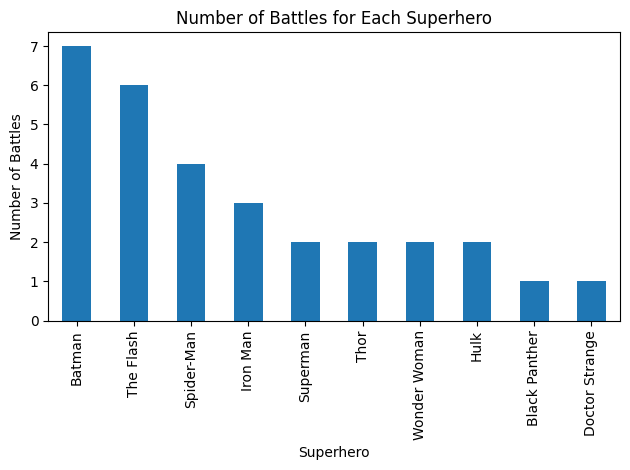

In [ ]:
import matplotlib.pyplot as plt

query = """
SELECT h.name AS hero,
       COUNT(*) AS battle_count
FROM battles b
JOIN heroes h ON b.hero_id = h.id
GROUP BY h.id, h.name
ORDER BY battle_count DESC;
"""

# Read the SQL query results into a DataFrame
df2 = pd.read_sql_query(query, conn)


# Create a bar plot
df2.plot(kind='bar', x='hero', y='battle_count', legend=False)

# Add labels and title
plt.xlabel('Superhero')
plt.ylabel('Number of Battles')
plt.title('Number of Battles for Each Superhero')


# Show the plot
plt.tight_layout()  # Helps with label spacing
plt.show()


## Submission Guidelines

Each group must submit a **Google Colab Notebook (.ipynb)** containing:
- ✅ **Database schema (DDL)**
- ✅ **CSV imports & data insertion (DML)**
- ✅ **SQL queries & results**
- ✅ **Custom feature (bonus if applicable)**

## Grading Criteria (Total: 25 Points)

| Section                 | Points |
|-------------------------|--------|
| Database Setup          | 5      |
| Data Importing         | 10     |
| Querying the Data      | 10     |
| Extra Feature          | 5      |
| Bonus Challenge (Optional) | +5  |

### Final Notes:
- Be **creative** when designing superheroes and villains.
- **Comment your code** to explain its functionality.
- **Have fun** building your superhero universe!